In [ ]:
# import numpy as np
import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np

# Definition du substrat
x = 100
y = 50
grid = domain.create_grid(x,y)     # [hauteur, largeur]

liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
liste_deltamu = np.linspace(-1.0, 1.0, 11)

nb_pas_temps = 500
gif = False

kT = liste_kT[2]
deltamu = liste_deltamu[0]

nb_iterations=10

# interpreter.gamma_dt(parametres[0], (x,y), kT, deltamu)
# interpreter.rugosite_dt(nb_pas_temps, parametres[1], (x,y), kT[0], deltamu[0])


# interpreter.plot_growth_2d(grid, show=True)

In [ ]:
liste_gamma_kbt=[]
liste_rugosite_kbt=[]
for param_kbT in liste_kT:
    print(param_kbT)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        print(b)
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, deltamu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_param=1/nb_iterations*np.sum(liste_gamma)
    rugosite_param=1/nb_iterations*np.sum(liste_rugosite)

    liste_gamma_kbt.append(gamma_param)
    liste_rugosite_kbt.append(rugosite_param)

print(liste_gamma_kbt)
print(liste_rugosite_kbt)

In [16]:
liste_gamma_mu=[]
liste_rugosite_mu=[]
for param_mu in liste_deltamu:
    print(param_mu)
    liste_gamma=[]
    liste_rugosite=[]
    for b in range(nb_iterations):
        print(b)
        x = 100
        y = 50
        grid = domain.create_grid(x,y)     # [hauteur, largeur]

        grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

        gamma_iteration=parametres[0][-1]
        liste_gamma.append(gamma_iteration)

        rugosite_iteration=parametres[1][-1]
        liste_rugosite.append(rugosite_iteration)

    gamma_param=1/nb_iterations*np.sum(liste_gamma)
    rugosite_param=1/nb_iterations*np.sum(liste_rugosite)

    liste_gamma_mu.append(gamma_param)
    liste_rugosite_mu.append(rugosite_param)

-1.0
0
1
2
3
4
5
6
7
8
9
-0.8
0
1
2
3
4
5
6
7
8
9
-0.6
0
1
2
3
4
5
6
7
8
9
-0.3999999999999999
0
1
2
3
4
5
6
7
8
9
-0.19999999999999996
0
1
2
3
4
5
6
7
8
9
0.0
0
1
2
3
4
5
6
7
8
9
0.20000000000000018
0
1
2
3
4
5
6
7
8
9
0.40000000000000013
0
1
2
3
4
5
6
7
8
9
0.6000000000000001
0
1
2
3
4
5
6
7
8
9
0.8
0
1
2
3
4
5
6
7
8
9
1.0
0
1
2
3
4
5
6
7
8
9


C:\Users\laure\AppData\Local\Temp\ipykernel_10656\2829285592.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


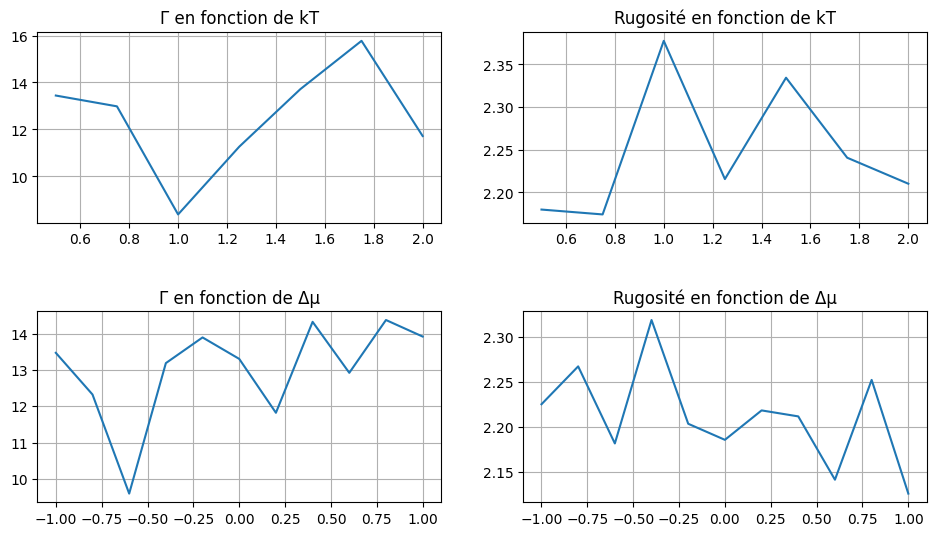

In [19]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
ax[0][0].plot(liste_kT,liste_gamma_kbt)
ax[0][0].grid()
ax[0][0].set_title("Γ en fonction de kT")

ax[0][1].plot(liste_kT,liste_rugosite_kbt)
ax[0][1].grid()
ax[0][1].set_title("Rugosité en fonction de kT")

ax[1][0].plot(liste_deltamu,liste_gamma_mu)
ax[1][0].grid()
ax[1][0].set_title("Γ en fonction de Δμ")

ax[1][1].plot(liste_deltamu,liste_rugosite_mu)
ax[1][1].grid()
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=3.0) 
fig.show()